In [7]:
#  Configuración y carga de librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# 2. Carga de datos
# ==============================
df = pd.read_csv('../data/combined_sleep_dataset.csv')

In [9]:
# 3. Selección de features y target

# Variables fuertes identificadas en el EDA
features = [
    'Physical Activity Level',
    'Daily Steps',
    'Blood Pressure',
    'Heart Rate',
    'Age',
    'Sleep Duration',
    'Quality of Sleep',
    'Stress Level',
    'BMI Category'
]

X = df[features]
y = df['Sleep_disorder']

In [10]:
# 4. Train/Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# 5. Pipeline de preprocesamiento + modelo

pipe = Pipeline([
    ('scaler', StandardScaler()),                     # Escalado de variables
    ('clf', RandomForestClassifier(random_state=42))   # Modelo
])


# 6. Búsqueda de hiperparámetros (opcional)

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_leaf': [1, 3]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)




Fitting 5 folds for each of 12 candidates, totalling 60 fits


Mejores parámetros: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 200}



=== Classification Report ===
              precision    recall  f1-score   support

           0      0.573     0.724     0.640       152
           1      0.182     0.108     0.136        37
           2      0.000     0.000     0.000        23
           3      0.492     0.586     0.535        99
           4      0.100     0.047     0.063        43
           5      0.910     0.929     0.919        98

    accuracy                          0.586       452
   macro avg      0.376     0.399     0.382       452
weighted avg      0.522     0.586     0.549       452



c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

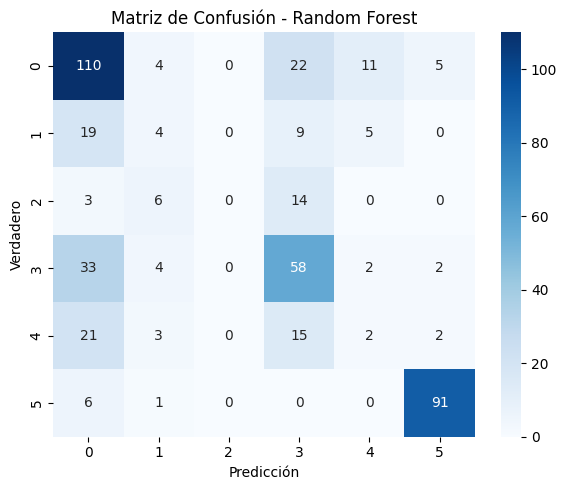

In [12]:

# 7. Evaluación en set de test

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()